In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### New York City Taxi Trip Duration
https://www.kaggle.com/c/nyc-taxi-trip-duration
Data fields
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

In [18]:
df = pd.read_csv('train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [22]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['duration'] = pd.to_timedelta(df.trip_duration, unit='s')
df['weekday'] = df.pickup_datetime.dt.weekday

In [25]:
df = df[['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']]

In [26]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1458644 non-null  object        
 1   pickup_datetime    1458644 non-null  datetime64[ns]
 2   dropoff_datetime   1458644 non-null  datetime64[ns]
 3   passenger_count    1458644 non-null  int64         
 4   pickup_longitude   1458644 non-null  float64       
 5   pickup_latitude    1458644 non-null  float64       
 6   dropoff_longitude  1458644 non-null  float64       
 7   dropoff_latitude   1458644 non-null  float64       
 8   trip_duration      1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 100.2+ MB
None


,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435


### Распределение количества поездок по дням
Посмотрим сколько поездок совершалось еженевно, для этого агрегируем все поездки по дням и посчитаем их количество.

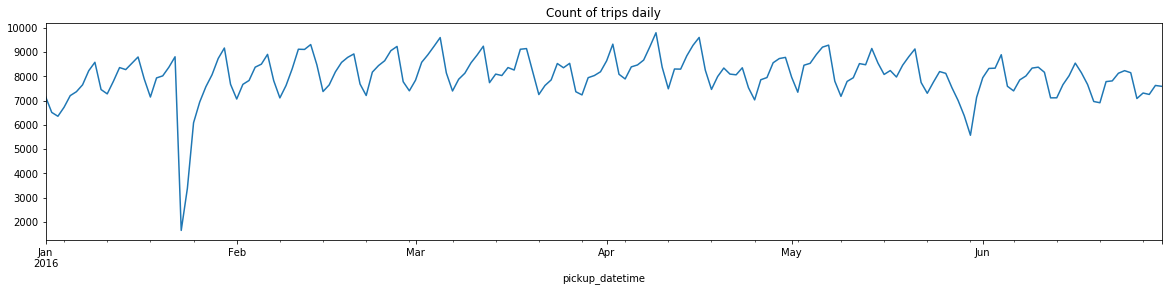

In [109]:
viz1 = df.groupby(df.pickup_datetime.dt.floor('d')).agg({'duration':'describe'})['duration']['count']
viz1.plot(figsize=(20,4), title='Count of trips daily')

На графике видно несколько пиков в месяц, видимо, в какой-то день недели количество поездок значительно превышает среднее внеделю. Есть два дня с значительными просадками в количестве. Можно посмореть с чем это было связано.

Из аналогичных данных посомтрим на распределение количества поездок в день.

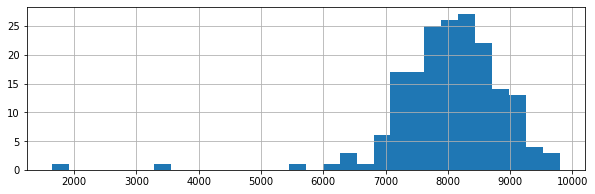

In [230]:
viz1.hist(figsize=(10,3), bins=30)

Распределение похоже на нормальное с медианой около 8000, не превышает 10000, имеет выбросы около 2000 и 3500

Ранее на график мы увидели, посмотрим как распределяется количество поездок в течение недели. 
Для этого объединим данные по дням недели, посчитаем количество и построим столбчатую диаграмму.

Text(0.5, 1.0, 'Amount of trips by weekday')

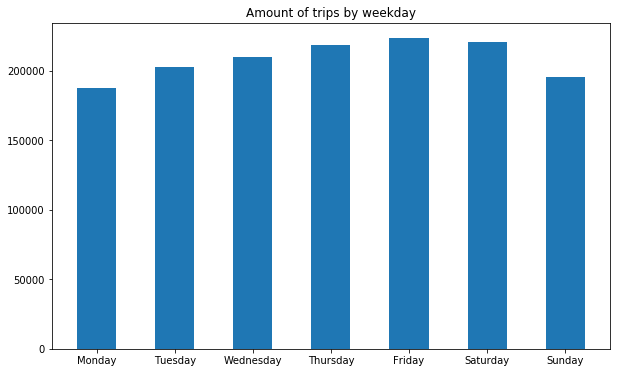

In [232]:
x = df.groupby('weekday').size()
plt.figure(figsize=(10,6))
plt.bar(x.index, height= x.values, width=0.5)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Amount of trips by weekday')

В целом оличество поездок больше всего пришлось на четверг, пятницу и субботу, но отрыв не значительно большой.

Было бы интересно посмотреть на распределение значений длительности поездок в течение недели. Но сначала посмотрим на основные описательные статистики.

In [237]:
df.duration.describe()

count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max            40 days 19:31:22
Name: duration, dtype: object

Смущает, что стандартное отклонение значительно превышает среднее значение. Значит, что в выборке много выбросов с большими значениями.
При построении boxplot уберем выбросы параметром showfliers = False.

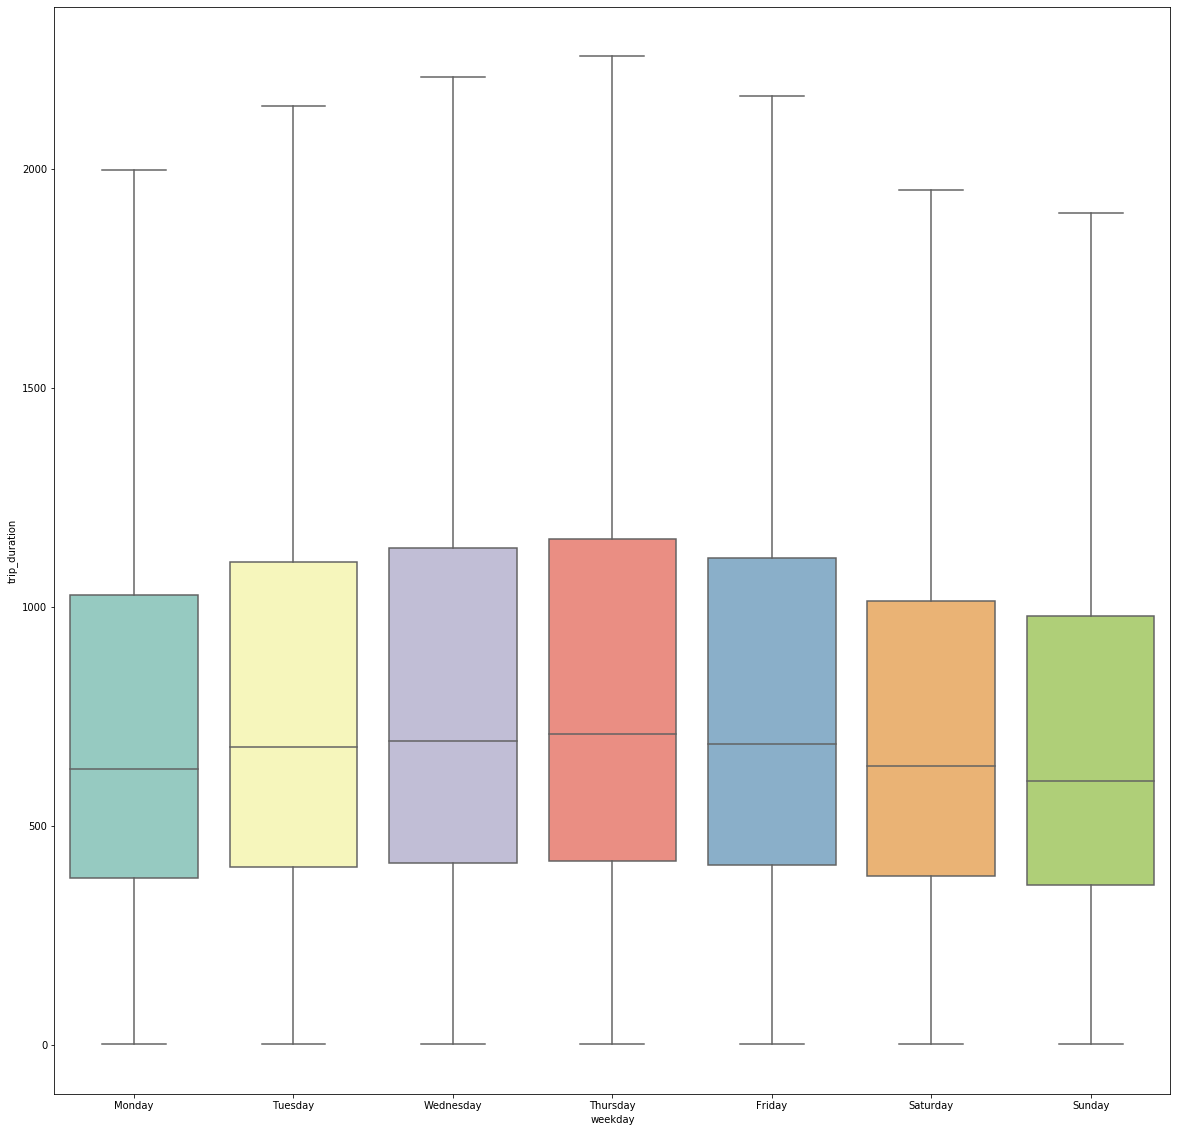

In [264]:
viz2 = df[['weekday', 'trip_duration']]
plt.figure(figsize=(20,20))
box = sns.boxplot(data=viz2, x='weekday', y='trip_duration', palette='Set3', showfliers = False)
box.set_xticklabels(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
box

Посмотрим в какое время наибольший спро на такси. Сведем поездки в сводную таблицу с днями недели в индексе и часом начала поездки в столбцах. Далее с помощью seaborn построим тепловую карту.

In [282]:
viz3 = df.pivot_table(index=df.pickup_datetime.dt.hour, columns=df.pickup_datetime.dt.day_name(), values='id', aggfunc='size')
viz3 = viz3[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].transpose()
viz3

pickup_datetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_datetime,,,,,,,,,,,,,,,,,,,,,
Monday,4299,2578,1658,1226,1351,2147,5357,8620,10342,10007,...,9910,9959,9160,10857,12959,12234,11334,11192,9608,6965
Tuesday,4506,2574,1508,1012,1142,2126,5779,10050,11608,10955,...,10422,10096,8948,11086,13477,13044,12726,12693,11503,8656
Wednesday,5327,3134,1890,1280,1252,2087,5833,10344,11889,10993,...,10611,10029,8806,10864,13195,13693,13183,13438,12407,9735
Thursday,6299,3632,2145,1550,1385,2222,6051,10408,11936,10919,...,10926,10445,8760,10684,13537,14066,13634,14171,13424,11715
Friday,8779,5804,3949,2924,2313,2461,5544,9607,11465,10553,...,10960,10220,8827,11027,13411,14176,12831,12580,13287,13181
Saturday,11768,9989,8240,6037,3849,1997,2535,3727,5480,7879,...,10873,10865,9996,11270,12920,13049,11228,11374,12371,13166
Sunday,12270,10860,8582,6866,4500,1962,2149,2844,4333,6357,...,10590,10197,9816,10695,11101,10046,9136,8737,7892,6367


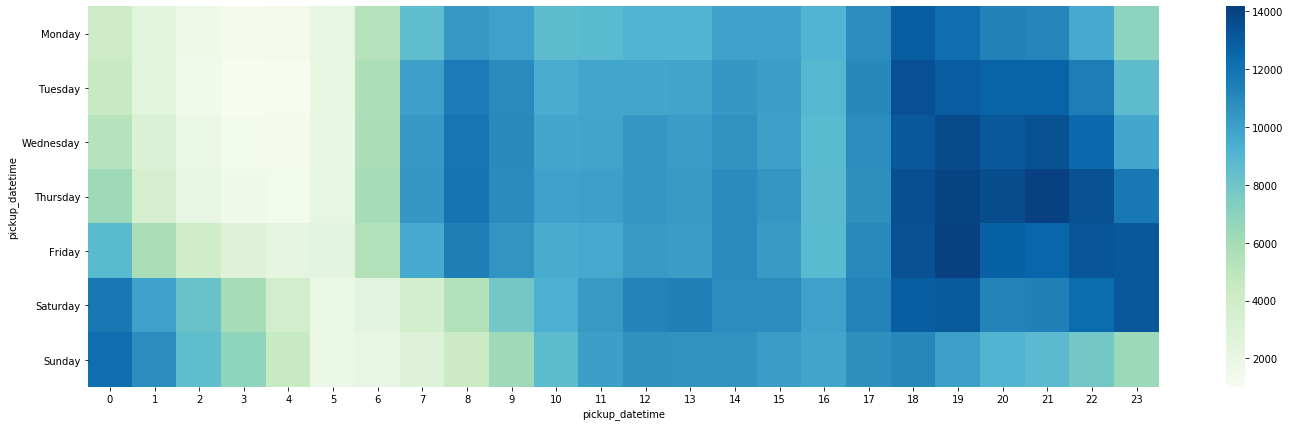

In [283]:
plt.figure(figsize=(24,7))
sns.heatmap(viz3, cmap='GnBu')

Здесь видим, что наибольший спрос на такси приходится в вечернее время с 18 до 23 вечера с понедельника по субботу и ночное время в выходные.

-----

_something extra_

Я понимаю, что для построения графиков по геоданным стоит использовать специальные библиотеки, и без контекста график ниже понять невозможно.

Тем не менее, зная (представляя) карту Нью-Йорка, можно обратить внимание, что большинство поездок начинаются и заканчиваются  
в центре Манхэттена. Разброс шире в координатах назначения поездки, слева далекий выброс в Нью-Джерси, справа точки в районе
Бруклина и Квинс, точки выше - Гарлем или, вероятнее, Бронкс. Одна далекая точка вызова - север штата.

Здесь нет графов и  не видно совпадают ли районы начала и окончания поездки.
Зато однозначно встает вопрос о выбросах в разрезе длительности поездок, где некоторые поездки длятся 25 или 40 дней и о большом количестве поездок в 1 секунду. Данные об этих поездках скорее всего не отражают реального маршрута и связаны с ошибкой или намеренно неверным вводом данных водителем.

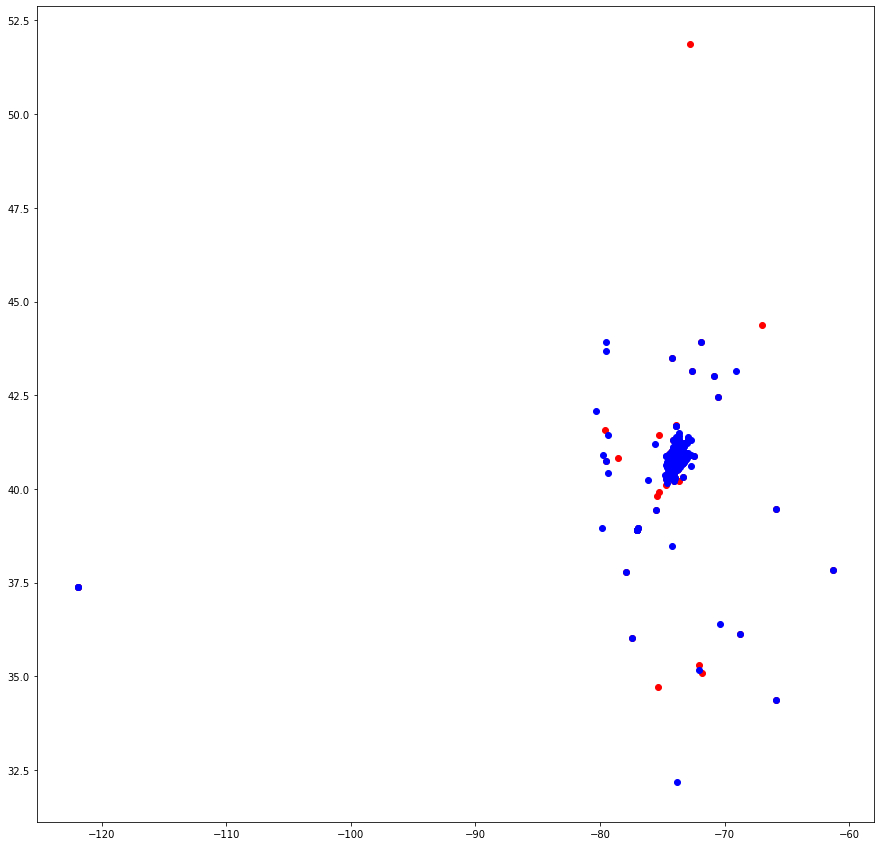

In [286]:
plt.figure(figsize=(15,15))
plt.scatter(df.pickup_longitude, df.pickup_latitude, color='red')
plt.scatter(df.dropoff_longitude, df.dropoff_latitude, color='blue')